# 逻辑回归
---
![](https://github.com/MachineLearning100/100-Days-Of-ML-Code/raw/master/Info-graphs/Day%204.jpg)

## 数据集|社交网络
---
![](https://github.com/MachineLearning100/100-Days-Of-ML-Code/raw/master/Other%20Docs/data.png?raw=true)

该数据集包含了社交网络中用户的信息。这些信息涉及用户ID,性别,年龄以及预估薪资。一家汽车公司刚刚推出了他们新型的豪华SUV，我们尝试预测哪些用户会购买这种全新SUV。并且在最后一列用来表示用户是否购买。我们将建立一种模型来预测用户是否购买这种SUV，该模型基于两个变量，分别是年龄和预计薪资。因此我们的特征矩阵将是这两列。我们尝试寻找用户年龄与预估薪资之间的某种相关性，以及他是否购买SUV的决定。

## 数据预处理
### 导入库

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 导入数据集

In [2]:
dataSet = pd.read_csv('../datasets/Social_Network_Ads.csv')
print(dataSet.shape)
dataSet.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=dataSet.iloc[:,[2,3]].values
Y=dataSet.iloc[:,4].values

### 划分成训练集和测试集

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

### 特征缩放

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

c:\users\wang\appdata\local\continuum\anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## 逻辑回归模型
该项工作的库将会是一个线性模型库，之所以被称为线性是因为逻辑回归是一个线性分类器，这意味着我们在二维空间中，我们两类用户（购买和不购买）将被一条直线分割。然后导入逻辑回归类。下一步我们将创建该类的对象，它将作为我们训练集的分类器。
### 将逻辑回归应用于训练集

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 预测
### 预测测试集结果

In [7]:
y_pred = classifier.predict(X_test)

## 评估预测
我们预测了测试集。 现在我们将评估逻辑回归模型是否正确的学习和理解。因此这个混淆矩阵将包含我们模型的正确和错误的预测。
### 生成混淆矩阵

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

In [35]:
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [10]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92        68
          1       0.89      0.75      0.81        32

avg / total       0.89      0.89      0.89       100



### 可视化

In [11]:
print(classification_report(Y_test,y_pred))

             precision    recall  f1-score   support

          0       0.89      0.96      0.92        68
          1       0.89      0.75      0.81        32

avg / total       0.89      0.89      0.89       100



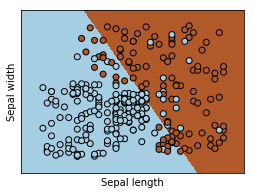

In [32]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx,yy =np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('age')
plt.ylabel('Estimated Salary')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()

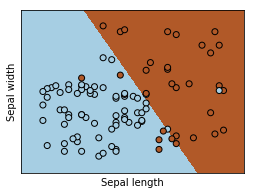

In [34]:
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
xx,yy =np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()]) 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(2, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('age')
plt.ylabel('Estimated Salary')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()